In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [4]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df.shape

(1259, 27)

In [7]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

### DATA PREPROCESSING

In [8]:
#Dropping Unnessary Features : 'Comments','State' ,'Country' and 'TimeStamp'

df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Country'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)



In [9]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
df['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

<Axes: xlabel='Gender'>

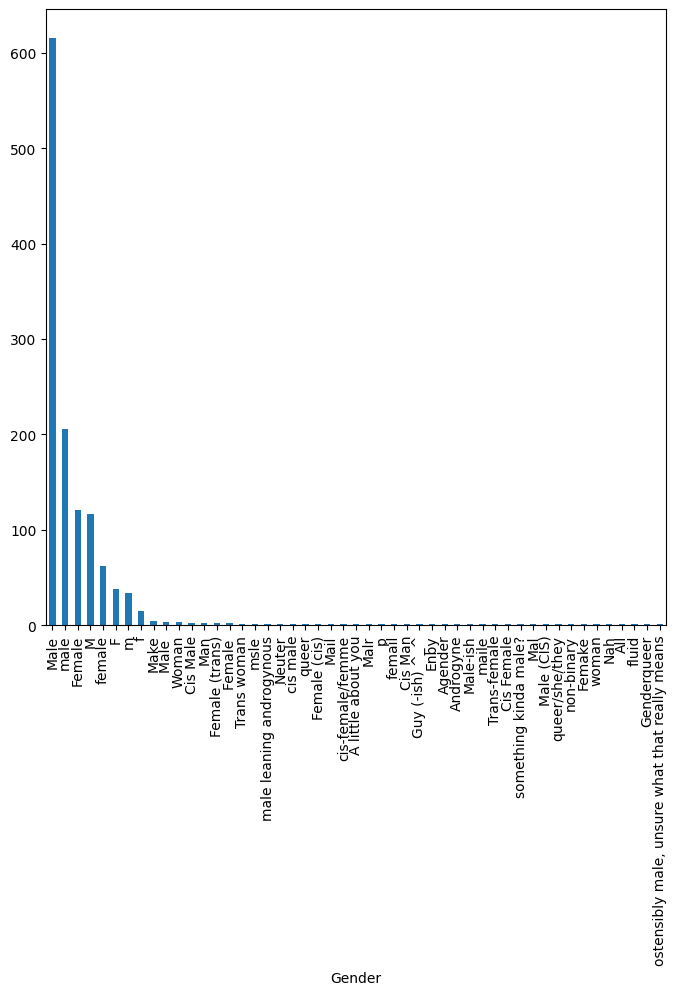

In [11]:
df['Gender'].value_counts().plot(kind = 'bar',figsize=(8,8))

In [12]:
# Getting Rid of Unnecassary Values in Feature 'Gender'

df['Gender'].replace(['male','M','m','Make','Man','Mair','Guy (-ish) ^_^',
                     'male leaning androgynous','Cis Man','msle','cis male','Mail',
                     'Androgyne','Male (CIS)','Male-ish','maile','something kinda male?',
                     'Mal','ostensibly male, unsure what that really means','Malr',
                      'Cis Male','Male '],'Male',inplace=True)

df['Gender'].replace(['female','F','f','Female ','Female (cis)','Femail',
                      'Femake', 'woman','Cis Female','femail','Woman',
                      'cis-female/femme'],'Female',inplace = True)

df['Gender'].replace(['Trans-female','queer/she/they', 'non-binary', 'Nah',
       'All', 'Enby', 'fluid', 'Genderqueer', 'Agender', 'Trans woman',
       'Neuter', 'Female (trans)', 'queer'],'Other',inplace = True)

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

In [13]:
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

<Axes: xlabel='Gender'>

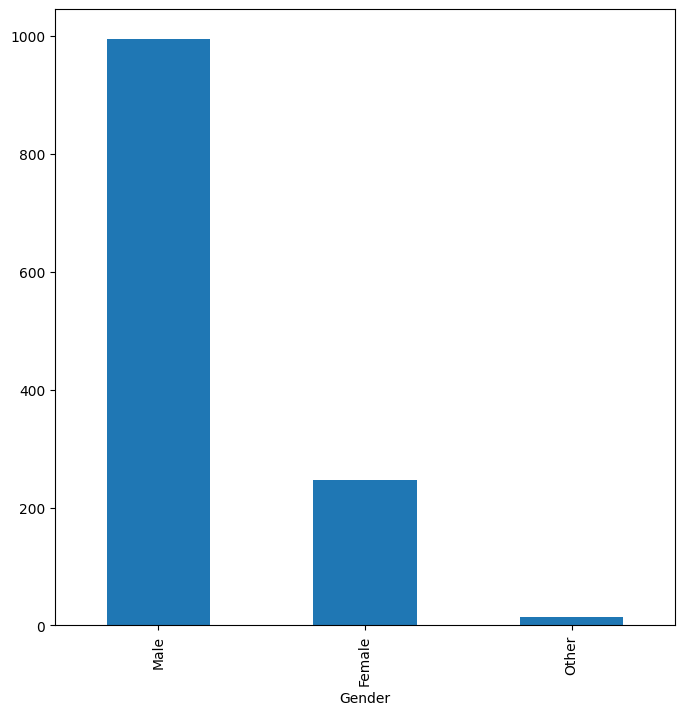

In [14]:
df['Gender'].value_counts().plot(kind = 'bar',figsize=(8,8))

<Axes: xlabel='Age'>

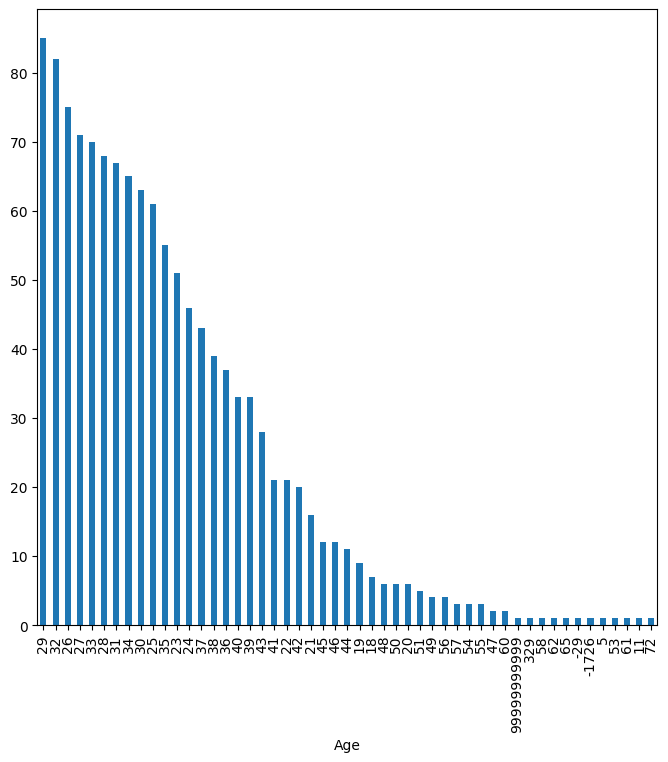

In [15]:
df['Age'].value_counts().plot(kind = 'bar',figsize=(8,8))

In [16]:
df['Age'].value_counts()

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 329             1
 58              1
 62              1
 65              1
-29              1
-1726            1
 5               1
 53              1
 61              1
 11              1
 72              1
Name: count, dtype: int64

In [17]:
#Range of data

df['Age'].value_counts().sort_index()

Age
-1726            1
-29              1
 5               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 99999999999     1
Name: count, dtype: int64

In [18]:
#Finding mean from ages between 18 and 75

mean_age = df[(df['Age'] <= 75) & (df['Age'] >= 18)]['Age'].mean()
mean_age=mean_age.astype(int)
mean_age

32

In [19]:
#Fixing Wrong Data in Age Feature 'Age'

df['Age'].replace(99999999999,mean_age,inplace=True)
df['Age'].replace(329,mean_age,inplace=True)
df['Age'].replace(-29,mean_age,inplace=True)

df['Age'].replace(-1726 ,mean_age,inplace=True)
df['Age'].replace(5 ,mean_age,inplace=True)
df['Age'].replace(11 ,mean_age,inplace=True)


df['Age'].value_counts()

Age
32    88
29    85
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: count, dtype: int64

<Axes: xlabel='Age'>

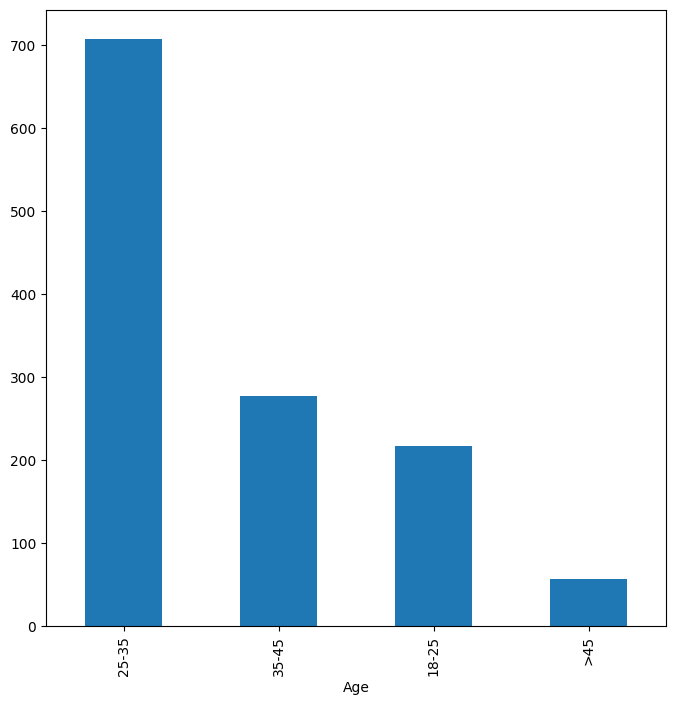

In [20]:
#Range of Feature "Age"

bins = [18,25,35,45,75];
age_cats = ["18-25", "25-35", "35-45", ">45"]
Age_Range = pd.cut(df['Age'], bins, labels= age_cats, include_lowest=True)
Age_Range.value_counts().plot(kind = 'bar',figsize=(8,8))

#Filling Missing Data


In [21]:
df.isnull().sum().sort_values(ascending=False)

work_interfere               264
self_employed                 18
Age                            0
anonymity                      0
mental_vs_physical             0
phys_health_interview          0
mental_health_interview        0
supervisor                     0
coworkers                      0
phys_health_consequence        0
mental_health_consequence      0
leave                          0
wellness_program               0
seek_help                      0
Gender                         0
care_options                   0
benefits                       0
tech_company                   0
remote_work                    0
no_employees                   0
treatment                      0
family_history                 0
obs_consequence                0
dtype: int64

In [22]:
df['self_employed'].value_counts()

self_employed
No     1095
Yes     144
Name: count, dtype: int64

In [23]:
df['self_employed'].fillna('No',inplace=True)

In [24]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        142
Name: count, dtype: int64

In [25]:
df['work_interfere'].fillna('Not Sure',inplace=True)

In [26]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    465
Not Sure     264
Never        213
Rarely       173
Often        142
Name: count, dtype: int64

In [27]:
df.isnull().sum().sort_values(ascending=False)

Age                          0
seek_help                    0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
wellness_program             0
Gender                       0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
obs_consequence              0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1257 non-null   int64 
 1   Gender                     1257 non-null   object
 2   self_employed              1257 non-null   object
 3   family_history             1257 non-null   object
 4   treatment                  1257 non-null   object
 5   work_interfere             1257 non-null   object
 6   no_employees               1257 non-null   object
 7   remote_work                1257 non-null   object
 8   tech_company               1257 non-null   object
 9   benefits                   1257 non-null   object
 10  care_options               1257 non-null   object
 11  wellness_program           1257 non-null   object
 12  seek_help                  1257 non-null   object
 13  anonymity                  1257 non-null   object
 14  leave        

#Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [31]:
df.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.351852,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,0.481481,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,0.259259,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,0.240741,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,0.240741,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,0.277778,Male,No,Yes,No,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,0.314815,Female,No,Yes,Yes,Sometimes,1-5,Yes,Yes,No,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,0.388889,Male,No,No,No,Never,1-5,Yes,Yes,No,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,0.444444,Female,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,0.092593,Male,No,No,No,Never,26-100,No,Yes,Don't know,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


#Preprocessing categorical features


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [33]:
# Seperating i/p and o/p

X = df.drop('treatment',axis=1)
y=df['treatment']

In [34]:
transformer =  ColumnTransformer([('ordinal_encoder',OrdinalEncoder(),['Gender','self_employed',
                                  'family_history','work_interfere','no_employees','remote_work',
                                  'tech_company' ,'benefits','care_options','wellness_program',
                                  'seek_help','anonymity','leave','mental_health_consequence',
                                  'phys_health_consequence','coworkers','supervisor','mental_health_interview',
                                  'phys_health_interview','mental_vs_physical','obs_consequence'])],remainder='passthrough')

In [108]:
X.shape

(1257, 22)

In [109]:
type(X)

numpy.ndarray

In [110]:
X[:5]

array([[0.        , 0.        , 0.        , 2.        , 4.        ,
        0.        , 1.        , 2.        , 1.        , 1.        ,
        2.        , 2.        , 2.        , 1.        , 1.        ,
        1.        , 2.        , 1.        , 0.        , 2.        ,
        0.        , 0.35185185],
       [1.        , 0.        , 0.        , 3.        , 5.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.48148148],
       [1.        , 0.        , 0.        , 3.        , 4.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        2.        , 2.        , 2.        , 2.        , 1.        ,
        0.        , 0.25925926],
       [1.        , 0.        , 1.        , 2.        , 2.        ,
        0.       

In [35]:
X = transformer.fit_transform(X)

In [36]:
X

array([[0.        , 0.        , 0.        , ..., 2.        , 0.        ,
        0.35185185],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48148148],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.25925926],
       ...,
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.2962963 ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.51851852],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.12962963]])

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder();
y = label_encoder.fit_transform(y);

In [39]:
y

array([1, 0, 0, ..., 1, 0, 1])

#Splitting DataSet Into Train/Test Set


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(879, 22) (378, 22) (879,) (378,)


#**Evaluating Models**



##Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [45]:
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,confusion_matrix,precision_score,recall_score,precision_recall_curve,f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict

###Accuracy

In [46]:
cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')

array([0.79522184, 0.80887372, 0.7883959 ])

###Confusion Matrix

In [47]:
y_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=3)

In [48]:
confusion_matrix_log = confusion_matrix(y_train, y_pred_log)

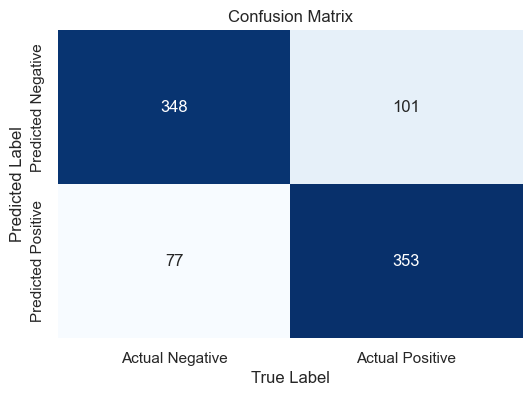

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.0)
sns.heatmap(confusion_matrix_log, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

###Precision/Recall/F1 Score

In [50]:
precision_score(y_train, y_pred_log)

0.7775330396475771

In [51]:
recall_score(y_train, y_pred_log)

0.8209302325581396

In [52]:
f1_score(y_train, y_pred_log)

0.7986425339366515

###Precision-Recall Curve

In [53]:
y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method='decision_function')

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [55]:
print(len(precisions))
print(len(recalls))
print(len(thresholds))

880
880
879


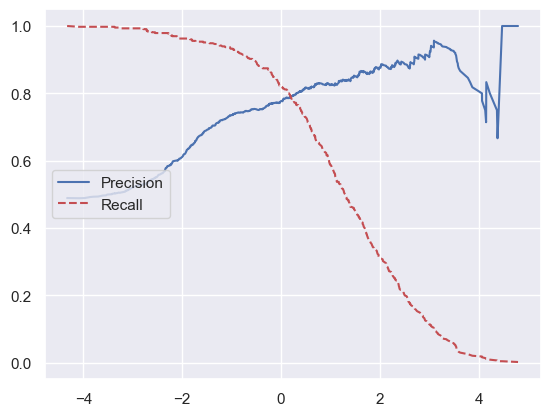

In [56]:
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'r--', label='Recall')
plt.legend(loc='center left')
plt.show()

###ROC Curve

In [57]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

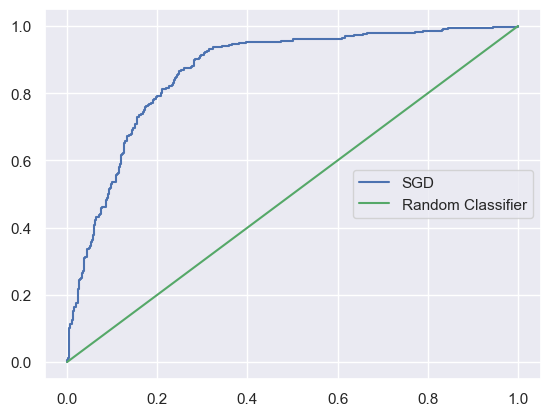

In [58]:
plt.plot(fpr, tpr, 'b-', label='SGD')
plt.plot([0, 1], [0, 1], 'g-', label='Random Classifier')
plt.legend(loc='center right')
plt.show()

In [59]:
roc_auc_score(y_train,  y_scores)

0.865587610711141

###Prediction Accuracy

In [60]:
y_pred_actual_log_reg = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_log_reg)
accuracy

0.7962962962962963

##Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier()

###Accuracy

In [62]:
cross_val_score(decision_tree, X_train, y_train, cv=3, scoring='accuracy')

array([0.72013652, 0.72354949, 0.79180887])

###Confusion Matrix

In [63]:
y_pred_dec_tree = cross_val_predict(decision_tree, X_train, y_train, cv=3)

In [64]:
confusion_matrix_dec_tree = confusion_matrix(y_train, y_pred_dec_tree)

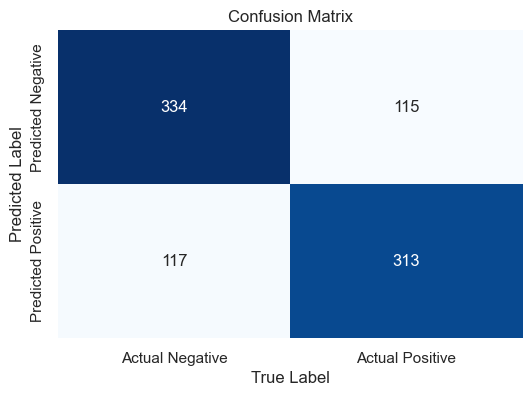

In [65]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.0)
sns.heatmap(confusion_matrix_dec_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

###Precision/Recall/F1 score

In [66]:
precision_score(y_train, y_pred_dec_tree)

0.7313084112149533

In [67]:
recall_score(y_train, y_pred_dec_tree)

0.727906976744186

In [68]:
f1_score(y_train, y_pred_dec_tree)

0.7296037296037295

###Precision-Recall Curve

In [69]:
y_probas_dec = cross_val_predict(decision_tree, X_train, y_train, cv=3, method='predict_proba')

In [70]:
y_scores_dec = y_probas_dec[:, 1]

In [71]:
precisions_dec, recall_dec, thresholds_dec = precision_recall_curve(y_train, y_scores_dec)

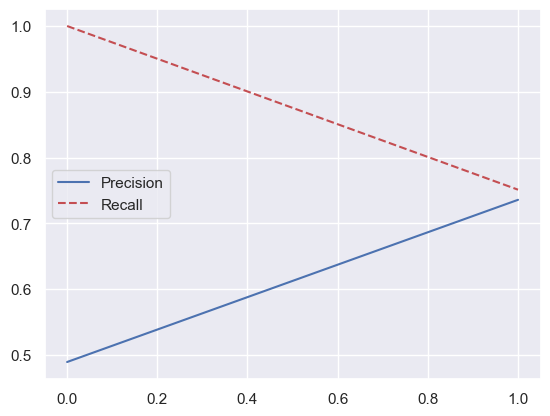

In [72]:
plt.plot(thresholds_dec, precisions_dec[:-1], 'b-', label='Precision')
plt.plot(thresholds_dec, recall_dec[:-1], 'r--', label='Recall')
plt.legend(loc='center left')
plt.show()

###ROC Curve

In [73]:
fpr_dec, tpr_dec, thresholds_dec = roc_curve(y_train, y_scores_dec)

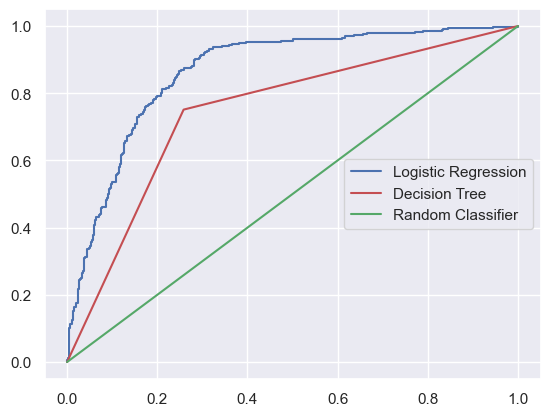

In [74]:
plt.plot(fpr, tpr, 'b-', label='Logistic Regression')
plt.plot(fpr_dec, tpr_dec, 'r-', label='Decision Tree')
plt.plot([0, 1], [0, 1], 'g-', label='Random Classifier')
plt.legend(loc='center right')
plt.show()

In [75]:
roc_auc_score(y_train,  y_scores_dec)

0.7464054488009529

###Prediction Accuracy


In [76]:
y_pred_actual_decision_tree = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_decision_tree)
accuracy

0.7433862433862434

##Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train, y_train)

RandomForestClassifier()

###Accuracy

In [79]:
cross_val_score(rand_for, X_train, y_train, cv=3, scoring='accuracy')

array([0.80887372, 0.85324232, 0.84300341])

###Confusion Matrix

In [80]:
y_pred_rand_for = cross_val_predict(rand_for, X_train, y_train, cv=3)

In [81]:
confusion_matrix_rand_for = confusion_matrix(y_train, y_pred_dec_tree)

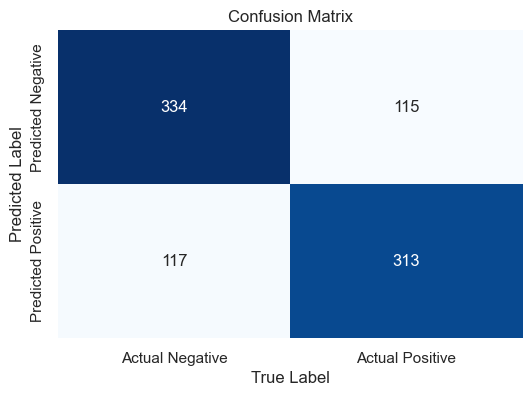

In [82]:
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.0)
sns.heatmap(confusion_matrix_rand_for, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

###Precision/Recall/F1 Score


In [83]:
precision_score(y_train, y_pred_rand_for)

0.7814432989690722

In [84]:
recall_score(y_train, y_pred_rand_for)

0.8813953488372093

In [85]:
f1_score(y_train, y_pred_rand_for)

0.8284153005464482

###Precision-Recall Curve

In [86]:
y_probas = cross_val_predict(rand_for, X_train, y_train, cv=3, method='predict_proba')

In [87]:
y_scores_rand = y_probas[:, 1]

In [88]:
precisions_rand, recall_rand, thresholds_rand = precision_recall_curve(y_train, y_scores_rand)

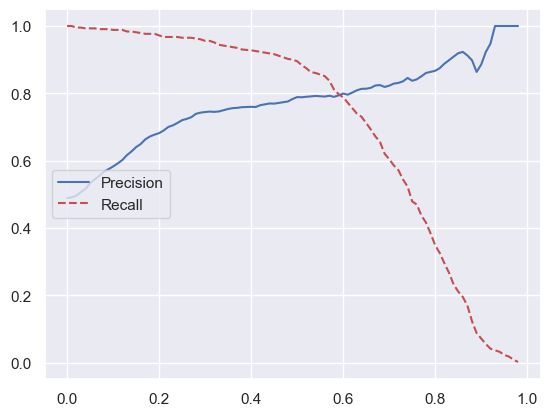

In [89]:
plt.plot(thresholds_rand, precisions_rand[:-1], 'b-', label='Precision')
plt.plot(thresholds_rand, recall_rand[:-1], 'r--', label='Recall')
plt.legend(loc='center left')
plt.show()

In [90]:
i = np.argmax(recall_rand < 0.9)

In [91]:
recall_rand[i]

0.8953488372093024

In [92]:
recall_rand[i-1]

0.9

In [93]:
i

49

In [94]:
threshold_90_recall = thresholds_rand[i - 1]

In [95]:
y_preds_90_recall = y_scores_rand >= threshold_90_recall

In [96]:
precision_score(y_train, y_preds_90_recall)

0.7834008097165992

In [97]:
recall_score(y_train, y_preds_90_recall)

0.9

In [98]:
y_pred_actual_random_forest = rand_for.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_random_forest)
accuracy

0.8333333333333334

###ROC Curve

In [99]:
fpr_rand, tpr_rand, thresholds_rand = roc_curve(y_train, y_scores_rand)

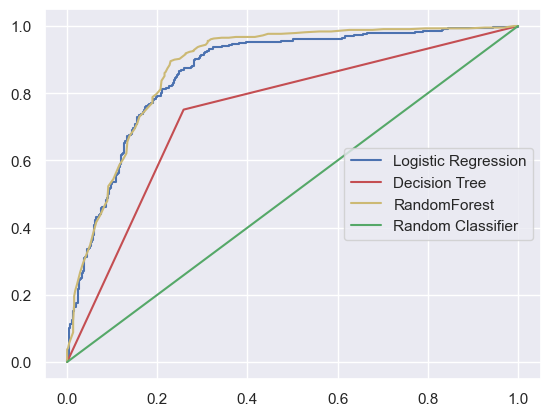

In [100]:
plt.plot(fpr, tpr, 'b-', label='Logistic Regression')
plt.plot(fpr_dec, tpr_dec, 'r-', label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, 'y-', label='RandomForest')
plt.plot([0, 1], [0, 1], 'g-', label='Random Classifier')
plt.legend(loc='center right')
plt.show()

In [101]:
roc_auc_score(y_train,  y_scores_rand)

0.8798078417154399

###Prediction Accuracy

In [102]:
y_pred_actual_random_forest = rand_for.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_random_forest)
accuracy

0.8333333333333334

In [103]:
a = X_test[5,:]

In [104]:
y_test[5]

1

In [105]:
rand_for.predict(a.reshape(1,-1))

array([1])

In [106]:
import pickle

In [107]:
pickle.dump(rand_for, open('rand_for.model', 'wb'))